<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/pytorch_datasets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

custom datasets refer to datasets created by the user to handle data that isnt part of the commonly used standard datasets
these are typically used when you have your own datai formats like iamges, text , audio or nemerical data or when you wan to prepocess or augment existing datasets in unique ways.

## key aspocets of cusom datasets.

1. non standard dataforamts: custom datasets are used when dat isnt proforammeted for frameowkr like pytorch for example
  - iamges stored in custom folder sturcres
  - tabular data in .csv file
  - coplex strcures lke multi modela

2. flexibility: custom datasets allow you to:
  - define specific data proporcessign steps.
  - apply cusotm data augmentaion
  - integrate data form multiple soruces


3. integration with dataloaders: custom datasetsare compatible with pytorches dataloader , which can handle batching , shuffling and parallel loadingof data, simplying training pipelines

## why use custom datasets in deep learing

- real- world applcations: most deep leanring projects rely on data unique to a specific domain( eg medical iamges , satellie data , sensor readigns) . predefined datasets often dont suti these needs

- cutom preporcessing: real-world data usually requires unique preprocessing stes lke normalizaion , resizing , tokenizaion or feature extracion
- data augmentaiton: custom datasets allow youto define specific augmentaion techiques ( eg roeation, croppign for iamges) to increase dataset diversity and robustness.

- efficency: cutom datasets can handle large-scale dat efficently by loading data on demand( lazy loaidng ) instead of keepign everythign in memory




## example custom dataset in pytorch for iamge data
hre an example of custom dataset for laodig iamge from disk


```py

import torch
from torch.utils.data import Dataset
from PIL import Image
import os

class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = os.listdir(image_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = 1 if "cat" in self.image_files[idx] else 0  # Example labeling
        return image, label


```

usage with dataloader

```py

from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load custom dataset
dataset = CustomImageDataset(image_dir="path/to/images", transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate over batches
for images, labels in dataloader:
    print(images.shape, labels)

```

these process can adapted ot other types of data such as text , audio or numerical datasts , using similar pronciples bu twith data-speicfic proprocessing steps.




In [141]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

our datasrt is a subset of food101 dataset.
food101 start 101 different classes of food
our datasetr starts with 3 classes of food and only 10% of the iamges
why do this?
when starting our ml project its imaportat to start with small scale and then increase the scale when necessary
the whole point is to spee up how fast how can exprement

In [142]:
import requests
import zipfile # our data is in form of zip file
from pathlib import Path
# setup apth of thdata
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'
# if the imagefolder does not exist download the data and if it exits skip
if image_path.is_dir():
  print(f"{image_path} directory exists")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)# this creates the direcotry



data/pizza_steak_sushi directory exists


In [143]:
# downlaod pizza, steak andsuchi data
with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('downloading pizza, steak and sushi data')
  f.write(request.content)
# unzip pizza, steak, sushi data

with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping pizza, steak and sushi data')
  zip_ref.extractall(image_path)

image_path


downloading pizza, steak and sushi data
unzipping pizza, steak and sushi data


PosixPath('data/pizza_steak_sushi')

## becoming one with the data ( data preparation and data exploration)

In [144]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory

  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [145]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'


In [146]:
# setup traing and testign paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## visualizing image
lets write some code to:
- get all of the imagepaths
- pick a ranom image path using ptyhon ranodm.choice

- get the image class name `pathlib.Path.parent.step`
- since were working with images lets open the image with python PIL
- well then show the image and print metadata

Random image path: data/pizza_steak_sushi/test/sushi/3177743.jpg
Image class: sushi
Image height: 512
Image width: 512


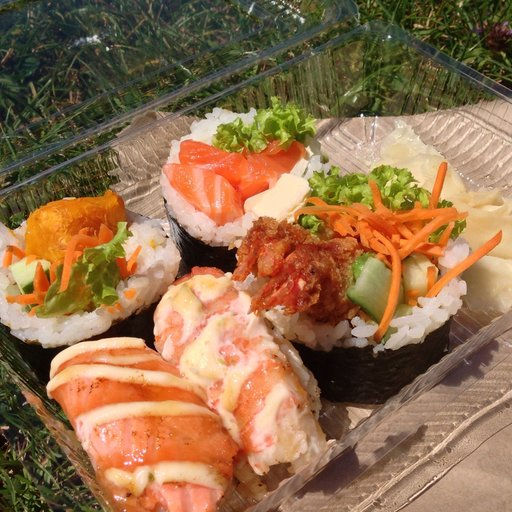

In [147]:
import random
from  PIL import Image

# set seed
#random.seed(42)

# get all  image paths

image_path_list = list(image_path.glob('*/*/*.jpg'))# list of all the images
# pick a random image path
random_image_path = random.choice(image_path_list)
random_image_path
# get image class from the path name ( the name class is teh name of the direcotry where the image is stored )
image_class = random_image_path.parent.stem # give me the calss name this is soo cool
# lets open the image using PIL

img = Image.open(random_image_path)
# show the image , this is so cool i like it  img

# print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

i### try to visualize iamge with matplotlib..



(512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

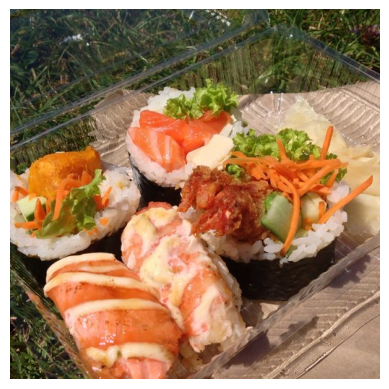

In [148]:
import numpy as np
import matplotlib.pyplot as plt # for ploting this is so cool
import matplotlib
%matplotlib inline
# turns image ot array
img_as_array = np.array(img)
# plot the image using matplotlib
plt.imshow(img_as_array)
print(img_as_array.shape)
plt.axis(False)

when plotting images using matplotlib , the image can either be a numpy array or pytorch tensor, byt ehre are some key differences in hanlding these tho formats:

1. numpy arrays:

matplotlbi is designed to work natively with numpy array if your image is a nupy array , youc an directly pass it to plt.imshow()

reuirements for numpy arrays:

-the array should have dimensiions:
  - H X W X C ( height x width x channels) for RGB images
  - H X W for grayscale images.

- the pixel values shuld be typcally be in one fo the following ranges:
  - [0,1] for normaized images ( eg floaiing point values)
  - [ o, 255] for integer (uints8) images.


example

```py

import matplotlib.pyplot as plt
import numpy as np

# Example RGB image as a NumPy array
image = np.random.rand(128, 128, 3)  # H x W x C
plt.imshow(image)
plt.title("RGB Image")
plt.axis("off")
plt.show()
```

2. pytorch tensors
if your iamge is in pytorch tesoor format, you may need to convert it to a numpy array befor plotting because matplotlib does not natively support pytorhc tensors

### key differences in tensors:

- pytorch tensors typically have dimennsions:
  - C X H X W
  - this si differenct form teh numpy format ( H X W X C ) so you need to tranopose the tensor to matpch the expected format

- if the gensor is on a GPU, you must move it to the CPU and convert it to ta NUMPY arrayusing .cpu().numpy()


example

convertion exaple

```py
import torch
import matplotlib.pyplot as plt

# Example tensor (C x H x W)
image_tensor = torch.rand(3, 128, 128)  # Random RGB image

# Convert to NumPy array
image_numpy = image_tensor.permute(1, 2, 0).numpy()  # H x W x C
plt.imshow(image_numpy)
plt.title("RGB Image from Tensor")
plt.axis("off")
plt.show()
```

### direct tensor visulaizaion (optinal)

if youre using libaresi like torchvisio , they provide utilies such as `torchvision.transforms.ToPILImage`` to convert a tesnor to a PIL image matplotlib can handle PIL image directly

example

```py

from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

image_tensor = torch.rand(3, 128, 128)  # Random RGB image

# Convert tensor to PIL Image
to_pil = ToPILImage()
image_pil = to_pil(image_tensor)

plt.imshow(image_pil)
plt.title("RGB Image from PIL")
plt.axis("off")
plt.show()

```



### tranforming data

before we can use our iamge data with pytorch or any other data:
1. turn your target data into tensors( in our case , numerical represetnaion of our iamges)
2. turn it into `torch.utils.data.Datasets` and subsequently a `torch.utils.data.DataLoader` well call these Dataset and DataLoader


In [149]:
#!pip install torchvision
import torch
from  torch.utils.data import DataLoader
from torchvision import datasets , transforms

### Tranforming data with `torchvison.tranforms`

In [150]:
# write a tranofmr forimage
data_transform = transforms.Compose([
    # resize the images
  transforms.Resize((64,64)),
  #Fip the iamegs randomnly on the horizontal
  transforms.RandomHorizontalFlip(p=0.5),
  # turn the image into a torch tensor
  transforms.ToTensor()
])# this compine many tranform together

In [151]:
data_transform(img).shape # this is so cool

torch.Size([3, 64, 64])

In [152]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  Plots a series of random images from image_paths.

  Args
    image_paths (list): List
    transform (PyTorch Transforms): Transforms to apply to images.
    n (int, optional): Number of images to plot. Defaults to 3.
    seed (int, optional): Random seed for the random generator. Defaults to 42.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      transformed_image = transform(f).unsqueeze(0)
      ax[1].imshow(transformed_image.squeeze().permute(1, 2, 0))
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape[-2:]}")
      ax[1].axis("off")
      plt.show()





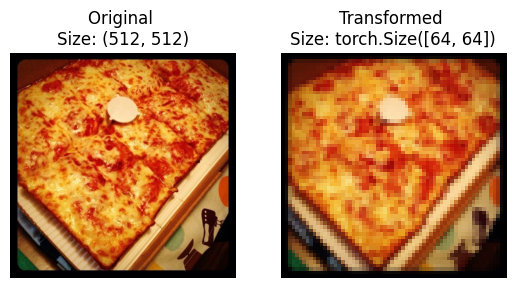

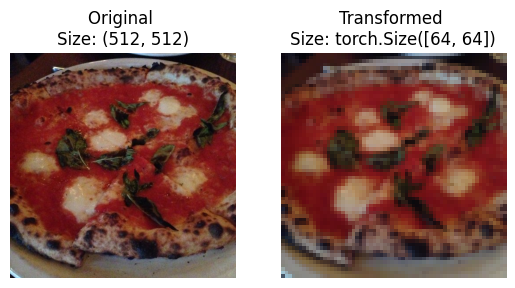

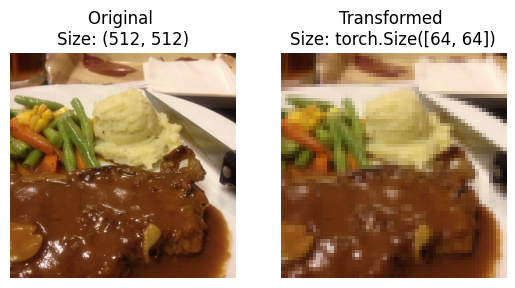

In [153]:
plot_transformed_images(image_path_list, data_transform, n=3)

### optional 1. loaidng image data using `imageFolder`
we can load image classifciaon data using `torchvision.datasets.ImageFloder`


In [154]:
# use Image Folder to create dataset(s)

from torchvision import datasets
from torch.utils.data import DataLoader

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [155]:
# get classname as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [156]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [157]:
# check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [158]:
# index on the train_data dataset to get a single image and labl

image , label = train_data[0]
class_names[label]

'pizza'

In [159]:
print(f"image shape: {image.shape}")
print(f"label: {label}")# this will give me the information about the image and its lable this is so cool
print(f"class name:{class_names[label]}")

image shape: torch.Size([3, 64, 64])
label: 0
class name:pizza


In [160]:
# Rearange the order dimensions
img_permute = image.permute(1,2,0)
img_permute.shape

torch.Size([64, 64, 3])

In [161]:
print(f"original image shape{image.shape}")
print(f"permute image shape{img_permute.shape}")

original image shapetorch.Size([3, 64, 64])
permute image shapetorch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

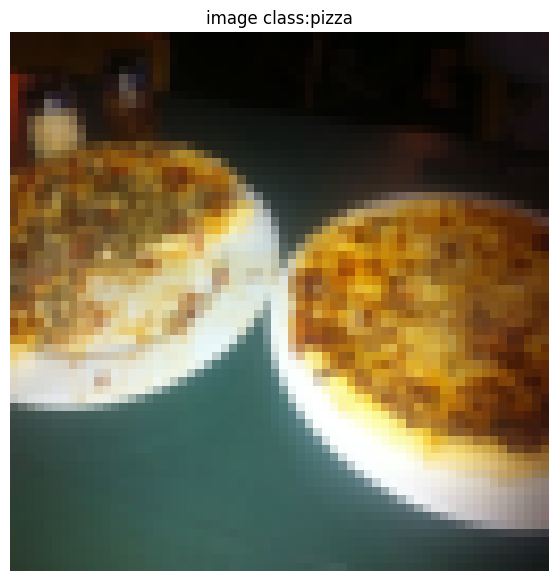

In [162]:
# plt the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"image class:{class_names[label]}")
plt.axis(False)
# once the image is permuted you can simpley draw it using matplotlib you dont have to convert it to array as said in the notes above , thiss is so cool


 ### Turn Data sets to Data loader


a dataloader is going to help us turn our dataset into itebles and can customise the batch_size so our model can learn effectively

In [163]:
# TUrn train and test datasets into DataLoaders
BATCH_SIZE = 1
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=1, pin_memory=True)


In [164]:
import os
os.cpu_count()# show how many cpu i have


2

In [165]:
!nvidia-smi# show which nvidai gpu you have if not this will be an error


/bin/bash: line 1: nvidia-smi#: command not found


In [166]:
img , label = next(iter(train_dataloader))
print(f"image shape:{img.shape}") # dataloader will add a batch dimenstion so if you want to plot you have to squuze it
print(f"label shape:{label.shape}")
# you can change the batch size based on what you feel like for me i ahve s


image shape:torch.Size([1, 3, 64, 64])
label shape:torch.Size([1])


### opttion 2 loading image data with a custom 'dataset'

- want to be able to load iamge form file
- want to be able to get class names form teh dataset
- want to be able to get classes as dictinonalry form the dataset

pros:
* can create a dataset out of almost anything
- not limited topytorch prebuilt dataset functions

cons:
- even throouth you colud create dataset out of amost anythhing , it doest mean it wil work ...

- using a custom dataset often resutl in us writing more code , which could lead to erros or performance issues



In [167]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset # this is what we are going to use
from torchvision import transforms
from typing import Tuple, Dict, List


In [168]:
# instance of torchvision.dataset.ImageFolder()
train_data.classes, train_data.class_to_idx# we want to do this but ourself this will be so cool


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### creating a helper function to get class names

we want to fuctnion to:
- get the class names using os.scandir() to travest target directory
- raise an error if the class naems aretn found ( if this happens , there might be somethign wrong with the directory sturcre)

- turn the classnames into a dict and a list and return them

In [169]:
# setup path for target directory
target_dir = pathlib.Path(train_dir)
print(f"target directory:{target_dir}")
# get the class names fro the target directory
class_names_found = [entry.name for entry in os.scandir(target_dir) if entry.is_dir()]
class_names_found

target directory:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [170]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  """
  Finds the class names in a target directory.
  """
  # get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  # raise an error if class names not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [171]:
find_classes(train_dir)# this is working and now we can use this

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### create a custom dataset to replciate imageFolder

to create our own custom dataset we want to:

- subclass torch.utils.data.Dataset
- init our subclass with a target directory as well as a trainform if e like to tranform our data
- create several attriutes:
  - path - paths of our iamges
  - tranform - the tranform we like to use
  - classes a list of the targe classes
  - class_to_idx - a dict of the target classes mapped to interger lables

- create a fucntion to load iamges this function will open an image
- overwrte the `__len__` to get the lenght of our dataset

- overwrite the `__getitem()__ ` to get a given sample when passed an item

In [172]:
from torch.utils.data import Dataset
# subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # intialize our custom dataset
  def __init__(self,target_dir:str, transform=None):
    self.path = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)
  def load_image(self, index:int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.path[index]
    return Image.open(image_path)
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.path)
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.path[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [173]:
# create a tranform
train_tranforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_tranforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


In [174]:
# test out imageFoldeCustom
train_data_custom = ImageFolderCustom(train_dir, transform=train_tranforms)
test_data_custom = ImageFolderCustom(test_dir, transform=test_tranforms)


In [175]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x791231101690>,
 <__main__.ImageFolderCustom at 0x7912311024d0>)

In [176]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})


### create a fuction to display random images

- take in a dataset and a number of other parametes such as class names and how many images to visualize
- to prevent the display getting out of hand , let cap the numbe ro image to see at 10

- set the random seed for reproducibility
- get a list of ranodm sample indexes form the target dataset .

- setupu a matploblib plot
- loop thourgh the ranodm smaple iames and plot them with matplotlib

- make sure the dimenstions of your images lineup with matplotlib(HWC)



In [177]:
# create a function to take in dataset

def display_random_images(dataset, classes, n=10, seed=42,display_shape: bool = True):
  # adjust display if n is to high
  if n > 10:
    n = 10
    display_shape = False
  # set the ranodm seed
  if seed:
    random.seed(seed)
  # get ranodm sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  #setup plot
  plt.figure(figsize=(16,8))
  plt.subplots_adjust(hspace=0.5)

  # loop thorugh ranodm inexes and plot them with maptplotlib
  for i , targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_shape = targ_image.shape
    targ_image = targ_image.permute(1,2,0)
    ax = plt.subplot(2,5,i+1)
    ax.imshow(targ_image)
    if classes:
      title = f"class: {classes[targ_label]}"
    else:
      title = f"label: {targ_label}"
    ax.set_title(title)
    ax.axis(False)
    if display_shape:
      plt.title(f"shape:{targ_image_shape}")



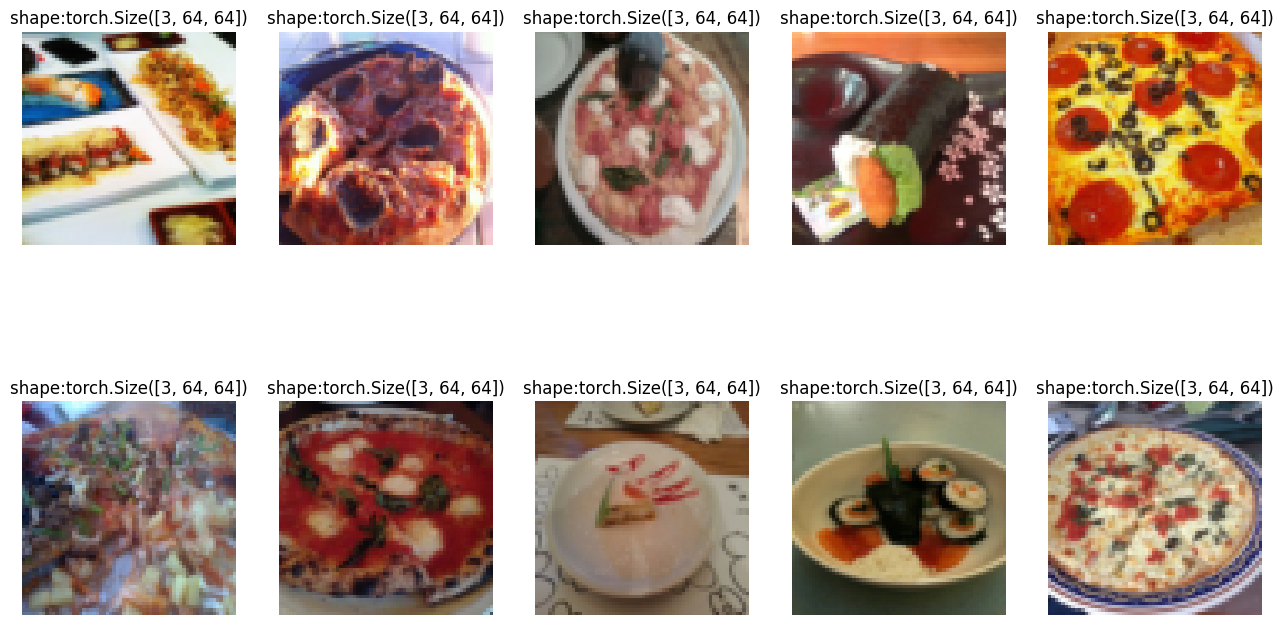

In [178]:
# display ranodom image from teh IMageFolder created dataset
display_random_images(train_data, train_data.classes)

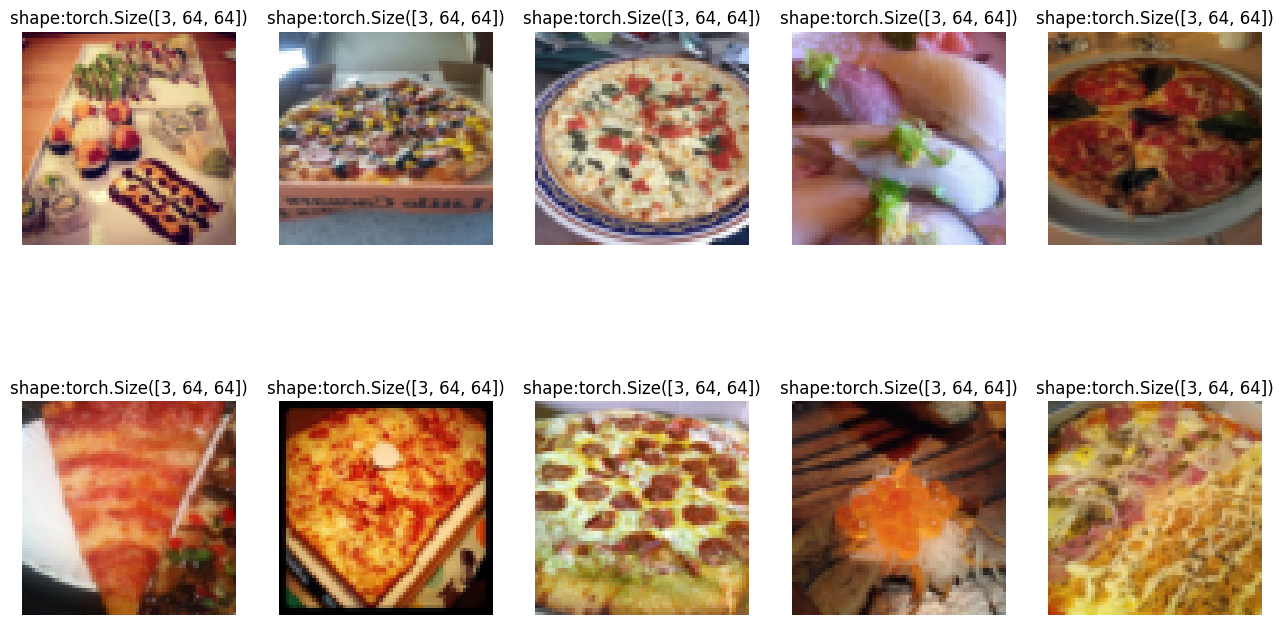

In [179]:
# display reanomd igae from IMageFOlderCUsotom dataset
display_random_images(train_data_custom, train_data_custom.classes)

### Turning our custom dataset into dataloader

In [180]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(train_data_custom, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)
test_dataloader_custom = DataLoader(test_data_custom, batch_size=BATCH_SIZE, shuffle=False, num_workers=1, pin_memory=True)


In [181]:
''' next(iter(train_dataloader_custom)) '''

' next(iter(train_dataloader_custom)) '

In [182]:
# get image and lable from customdataloader
img_custom , label_custom = next(iter(train_dataloader_custom))
print(f"image shape:{img_custom.shape}")
print(f"label shape:{label_custom.shape}")

image shape:torch.Size([32, 3, 64, 64])
label shape:torch.Size([32])


### Other forms of tranforms(data augmentation)
DATA_AUTGMENTATION: in data analysis are techiues used to increase the amout of data by adding sligtly modified copies of already existiong data or newly coreated systetic daat from existing data . it acts as a regulaizor and helps reduce overfitting when traing models. it it closely related to oversampling in data anaysis

lets take a look at one particular type of data augmentaiton used torain pytorch vision modles to state of the art levels...
this praticeit hopefully result sin a model that more generizes to the traing data




In [183]:
#lets look at trivail augment

from torchvision import  transforms

train_tranform= transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_tranform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [184]:
# get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

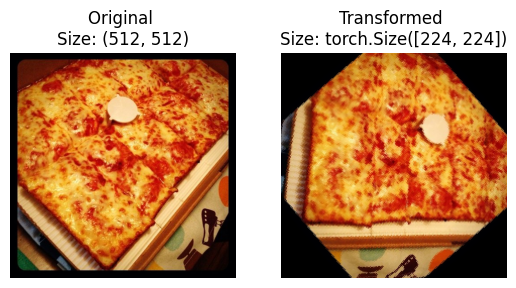

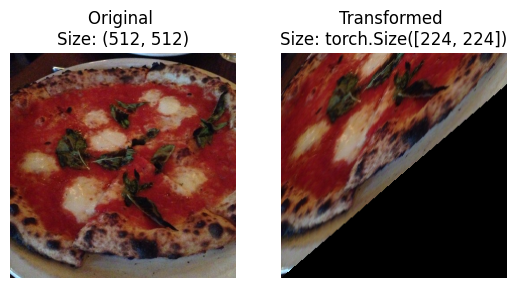

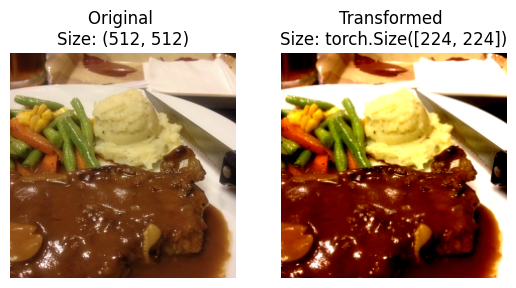

In [188]:
# plot random images
plot_transformed_images(image_path_list, train_tranform, n=3)

### buiding the baseline model